In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from lmfit import Parameters, minimize, fit_report

output_dir = os.getcwd()

In [50]:
# to contain all the data into one place
# only need to run if we have new data
import pickle



data_dict = {
    # "etiso8_njet0_qcd26_2860":{
    #     "HW":[
    #         "40.2007 +/- 0.0498654 GeV", "41.7238 +/- 0.0435543 GeV", "42.2018 +/- 0.0394319 GeV", 
    #         "42.8112 +/- 0.0449951 GeV", "43.3732 +/- 0.0488116 GeV", "43.7649 +/- 0.0404085 GeV", 
    #         "45.4105 +/- 0.0461441 GeV"
    #     ],
    #     "ATLAS": "42.9888 +/- 0.0492722 GeV",
    #     "Zee": "48.4573 +/- 0.045495 GeV"
    # },
    # "etiso8_njet0_qcd24_2860":{
    #     "HW":[
    #         "40.2201 +/- 0.0458603 GeV", "41.7454 +/- 0.0415693 GeV", "42.2109 +/- 0.0481317 GeV", 
    #         "42.8249 +/- 0.048744 GeV", "43.3886 +/- 0.0528501 GeV", "43.779 +/- 0.0425592 GeV", 
    #         "45.4216 +/- 0.0481605 GeV"
    #     ],
    #     "ATLAS": "42.9888 +/- 0.0492722 GeV",
    #     "Zee": "48.4573 +/- 0.045495 GeV"
    # },
    "etiso8_njet0_qcd28_2860":{
        "HW":[
            "40.1981 +/- 0.0482833 GeV", "41.7111 +/- 0.0437175 GeV", "42.1721 +/- 0.0432871 GeV", 
            "42.808 +/- 0.0445995 GeV", "43.3672 +/- 0.0477838 GeV", "43.7556 +/- 0.0402337 GeV", 
            "45.3971 +/- 0.0456019 GeV"
        ],
        "ATLAS": "42.9888 +/- 0.0492722 GeV",
        "Zee": "48.4573 +/- 0.045495 GeV"
    },
    "etiso8_njet0_qcd30_2860":{
        "HW":[
            "40.1813 +/- 0.0500919 GeV", "41.7065 +/- 0.0447196 GeV", "42.163 +/- 0.0431083 GeV", 
            "42.7804 +/- 0.0438798 GeV", "43.3535 +/- 0.0480125 GeV", "43.735 +/- 0.0413547 GeV", 
            "45.3886 +/- 0.0464883 GeV"
        ],
        "ATLAS": "42.9888 +/- 0.0492722 GeV",
        "Zee": "48.4573 +/- 0.045495 GeV"
    },
    "etiso8_njet0_qcd32_2860":{
        "HW":[
            "40.1601 +/- 0.049198 GeV", "41.6833 +/- 0.0453592 GeV", "42.1572 +/- 0.0428555 GeV", 
            "42.7776 +/- 0.0487318 GeV", "43.3467 +/- 0.0475745 GeV", "43.7377 +/- 0.0432151 GeV", 
            "45.3737 +/- 0.0443178 GeV"
        ],
        "ATLAS": "42.9888 +/- 0.0492722 GeV",
        "Zee": "48.4573 +/- 0.045495 GeV"
    },
    "etiso8_njet0_qcd30_2665":{
        "HW":[
            "39.9074 +/- 0.0434295 GeV", "41.6921 +/- 0.0453284 GeV", "42.1494 +/- 0.0431331 GeV", 
            "42.76 +/- 0.0404453 GeV", "43.3123 +/- 0.0472577 GeV", "43.7206 +/- 0.0412543 GeV", 
            "45.3408 +/- 0.0446515 GeV"
        ],
        "ATLAS": "42.887 +/- 0.050338 GeV",
        "Zee": "48.4963 +/- 0.0441471 GeV"
    },
    "etiso8_njet0_qcd30_3050":{
        "HW":[
            "40.2248 +/- 0.0521148 GeV", "41.813 +/- 0.0558318 GeV", "42.2825 +/- 0.0561725 GeV", 
            "42.8797 +/- 0.0565798 GeV", "43.4999 +/- 0.0680521 GeV", "43.8043 +/- 0.0590148 GeV", 
            "45.5063 +/- 0.0991394 GeV"
        ],
        "ATLAS": "43.183 +/- 0.0578452 GeV",
        "Zee": "48.3413 +/- 0.172757 GeV"
    },
    "qcd30_2860":{
        "HW":[
            "38.2145 +/- 0.357454 GeV", "39.7824 +/- 1.82401 GeV", "40.2208 +/- 0.0766956 GeV", 
            "40.6048 +/- 0.0663849 GeV", "41.1776 +/- 0.0675239 GeV", "41.7536 +/- 0.0802494 GeV", 
            "43.3248 +/- 0.181084 GeV"
        ],
        "ATLAS": "41.5488 +/- 0.0573084 GeV",
        "Zee": "49.0958 +/- 0.0523645 GeV"
    },
    "njet0_qcd30_2860":{
        "HW":[
            "40.0864 +/- 0.0501756 GeV", "41.6504 +/- 0.0448808 GeV", "42.1292 +/- 0.0443299 GeV", 
            "42.7486 +/- 0.0469758 GeV", "43.3101 +/- 0.0482234 GeV", "43.711 +/- 0.0395416 GeV", 
            "45.354 +/- 0.0473728 GeV"
        ],
        "ATLAS": "42.8544 +/- 0.0478911 GeV",
        "Zee": "48.4548 +/- 0.0457963 GeV"
    },
    "etiso8_qcd30_2860":{
        "HW":[
            "38.7975 +/- 0.430237 GeV", "40.48 +/- 0.113734 GeV", "40.704 +/- 0.0496276 GeV", 
            "41.2512 +/- 0.0639704 GeV", "41.6832 +/- 0.0541471 GeV", "42.3488 +/- 0.0459104 GeV", 
            "44.3872 +/- 0.0748786 GeV"
        ],
        "ATLAS": "41.8176 +/- 0.0578123 GeV",
        "Zee": "49.1039 +/- 0.0501286 GeV"
    },
    
}

print(len(data_dict.keys()))

with open(os.path.join(output_dir, "gauge_curve_data.pkl"), "wb") as f:
    pickle.dump(data_dict, f)


8


In [51]:
def convert_errstr_array(errstr_list):
    '''
    Converts list of strings of values with errors to two numpy arrays, 
    One with values and other with errors.
    '''
    if type(errstr_list) == list:
        val_arr = np.zeros(len(errstr_list))
        errval_arr = np.zeros(len(errstr_list))

        for i, errstr in enumerate(errstr_list):
            val, err_GeV = errstr.split("+/-")
            err_val = float(err_GeV[:-4])
            val = float(val)

            val_arr[i] = val
            errval_arr[i] = err_val

        return val_arr, errval_arr
        
    elif type(errstr_list) == str:
        errstr = errstr_list
        val, err_GeV = errstr.split("+/-")
        err_val = float(err_GeV[:-4])
        val = float(val)

        return val, err_val

def residual(params, x, data, unc):
    '''Residual function we want to minimize'''
    slope = params["a"]
    intercept = params["b"]

    model = slope * x + intercept  # simple linear curve

    return (model - data) / unc

# def get_params(val_arr, errval_arr, mw_arr, atlas_halfmax, show=True):
#     '''Get the parameters from the linear fit'''
#     # perform linear fit
#     (a, b), cov = np.polyfit(mw_arr, val_arr, deg=1, cov=True, w = 1. / errval_arr)

#     if show:
#         plt.plot(mw_arr, a * mw_arr + b, label="Fit")
#         plt.errorbar(mw_arr, val_arr, yerr=errval_arr, label="data", marker="o", ls="", ms=5.0)

#     # get the mass of the W boson
#     mw_data = (atlas_halfmax - b) / a

#     return a, b, cov, mw_data


 Current Configuration: etiso8_njet0_qcd28_2860
a = 0.5212 +- 0.0081, b = 1.0729 +- 0.6479
Mass of W boson from ATLAS data: 80.424 +- 0.104 GeV
W boson mass is 0.087 sigma away from accepted value
Mass of Z boson: 90.916 +- 0.197 GeV
Z boson mass is 1.374 sigma away from accepted value

 Current Configuration: etiso8_njet0_qcd30_2860
a = 0.5214 +- 0.0080, b = 1.0430 +- 0.6452
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 8.67925377
    reduced chi-square = 1.73585075
    Akaike info crit   = 5.50517784
    Bayesian info crit = 5.39699814
[[Variables]]
    a:  0.52138066 +/- 0.00804819 (1.54%) (init = 0.5)
    b:  1.04299421 +/- 0.64515035 (61.86%) (init = 1.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.999
[[ 6.47733874e-05 -5.18914267e-03]
 [-5.18914267e-03  4.16218969e-01]]
Mass of W boson from ATLAS data: 80.451 +- 0.104 GeV
W boson mass is 0.

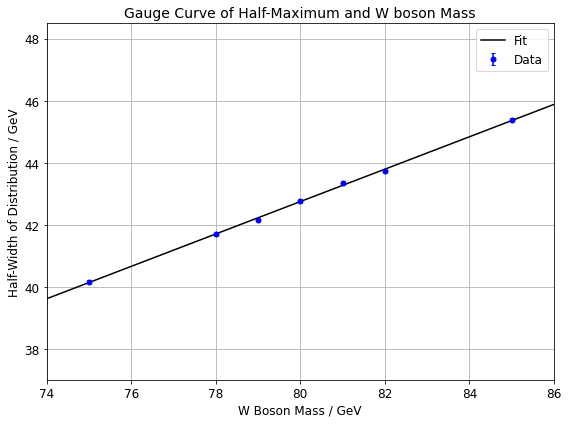

In [52]:
# the main code

# # halfwidth obtained when running ATLAS data with the given cuts
# atlas_halfwidth_arr = [
#     0., 0., 0., 0., "41.2065 +/- 0.202642 GeV",
#     "40.925 +/- 0.931269 GeV", "40.925 +/- 0.931269 GeV",
#     "43.183 +/- 0.0578452 GeV"
# ]
# atlas_halfwidth_arr = [
#     "42.887 +/- 0.050338 GeV", "41.1398 +/- 0.280774 GeV",
#      "42.6352 +/- 0.0931504 GeV", "42.887 +/- 0.050338 GeV",
#     "42.887 +/- 0.050338 GeV", "41.2065 +/- 0.202642 GeV",
#     "40.925 +/- 0.931269 GeV", "40.925 +/- 0.931269 GeV",
#     "43.183 +/- 0.0578452 GeV", "43.157 +/- 0.0518855 GeV",
#     "43.157 +/- 0.0518855 GeV", "43.157 +/- 0.0518855 GeV",
#     "43.157 +/- 0.0518855 GeV", "43.2131 +/- 0.0633281 GeV",
#    "43.1787 +/- 0.0543769 GeV"
# ]   
# print(len(atlas_halfwidth_arr))

# atlas_zboson_arr = [
#     "48.4963 +/- 0.0441471 GeV", "48.8135 +/- 0.0606542 GeV", 
#     "48.8135 +/- 0.0606542 GeV", "48.8135 +/- 0.0606542 GeV", 
#     "48.8135 +/- 0.0606542 GeV", "48.8135 +/- 0.0606542 GeV", 
#     "48.8135 +/- 0.0606542 GeV", "48.8135 +/- 0.0606542 GeV", 
#     "48.8135 +/- 0.0606542 GeV", "48.4135 +/- 0.0606542 GeV", 
#     "48.4135 +/- 0.0606542 GeV", "48.8135 +/- 0.0606542 GeV", 
#     "48.8135 +/- 0.0606542 GeV", "48.329 +/- 0.107969 GeV",
#     "48.3908 +/- 0.100827 GeV"
# ]

# atlas_halfwidth_arr = [
#     "43.2131 +/- 0.0633281 GeV", "43.1787 +/- 0.0543769 GeV"
# ]

# atlas_zboson_arr = [
#     "48.329 +/- 0.107969 GeV", "48.3908 +/- 0.100827 GeV"
# ]

# W boson masses
mW_arr = np.array([
    75, 78, 79, 80, 81, 82, 85
])

# create parameter object
params = Parameters()

# choose initial guess as from past reports
params.add("a", value=0.5)
params.add("b", value=1.3)


# read out data
with open(os.path.join(output_dir, "gauge_curve_data.pkl"), "rb") as f:
    data_dict = pickle.load(f)

# print(data_dict.keys())

plot = True

atlas_mw_arr = np.zeros(len(data_dict.keys()))
atlas_mw_err_arr = np.zeros_like(atlas_mw_arr)

# get parameters for each given set and cut
for i, (config, datas) in enumerate(data_dict.items()):
    print("\n Current Configuration: {0}".format(config))

    hws_str = datas["HW"]

    hw, hw_err = convert_errstr_array(hws_str)

    # perform linear fit
    out = minimize(residual, params, args=(mW_arr, hw, hw_err))

    # get parameter values and errors
    a, a_err = out.params["a"].value, np.sqrt(out.covar[0][0])
    b, b_err = out.params["b"].value, np.sqrt(out.covar[1][1])

    print("a = {0:.4f} +- {1:.4f}, b = {2:.4f} +- {3:.4f}".format(a, a_err, b, b_err))

    # also get correlation coefficients
    # covar matrix is symmetrix, so covar_10 = covar_01
    corr_coeff = out.covar[1][0]

    # print out full fit report if need be
    

    # plot data with fit

    if i == 1:
        print(fit_report(out))
        fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)

        xfit = np.linspace(70, 90, 500)
        yfit = a * xfit + b
        ax.plot(xfit, yfit, label="Fit", color="k")
        ax.errorbar(mW_arr, hw, yerr=hw_err, label="Data", color="b", marker="o", ls="", ms=5.0, capsize=2.0)

        ax.set_xlabel("W Boson Mass / GeV", fontsize=12)
        ax.set_ylabel("Half-Width of Distribution / GeV", fontsize=12)
        ax.set_title("Gauge Curve of Half-Maximum and W boson Mass", fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.tick_params(axis='both', which='minor', labelsize=12)
        ax.set_xlim([74, 86])
        ax.grid()
        ax.legend(prop={"size":12})

        plt.savefig("report/figures/gauge_curve.pdf", dpi=400)

        print(out.covar)


    
    # also convert atlas data from str to float
    # print(atlas_halfwidth_arr[i])
    atlas_hw, atlas_hw_err = convert_errstr_array(datas["ATLAS"])

    # get the mass of W boson from obtained halfwidth
    atlas_mW = (atlas_hw - b) / a   # from y = mx +b  => x = (y - b) / a
    hb_err = np.sqrt(atlas_hw_err**2. + b_err**2.)

    # take into account correlation between a and b
    atlas_mW_err = atlas_mW * np.sqrt( np.abs((a_err / a)**2. + (hb_err / (atlas_hw - b))**2. + (2 * corr_coeff / (a * (atlas_hw - b)))) )
    print("Mass of W boson from ATLAS data: {0:.3f} +- {1:.3f} GeV".format(atlas_mW, atlas_mW_err))

    # append the results
    atlas_mw_arr[i] = atlas_mW
    atlas_mw_err_arr[i] = atlas_mW_err

    # compare with accepted value of mW
    mW_accepted = 80.433 

    mW_tval = np.abs(atlas_mW - mW_accepted) / (atlas_mW_err)
    print("W boson mass is {0:.3f} sigma away from accepted value".format(mW_tval))

    # evaluate z boson mass as well

    mZ_hw, mz_hw_err = convert_errstr_array(datas["Zee"])

    mZ = (mZ_hw - b) / a
    mZ_err = mZ * np.sqrt( np.abs((a_err / a)**2. + (hb_err / (mZ_hw - b))**2. + (2 * corr_coeff / (a * (mZ_hw - b)))) )

    print("Mass of Z boson: {0:.3f} +- {1:.3f} GeV".format(mZ, mZ_err))

    # compare with actual value
    mZ_true = 91.1876
    mZ_tval = np.abs(mZ - mZ_true) / (mZ_err)
    print("Z boson mass is {0:.3f} sigma away from accepted value".format(mZ_tval))


In [27]:
# other datas
# data_dict = {
#     "etiso8_njet0_qcd37_2665":[
#         "39.4784 +/- 0.0423736 GeV", "41.2451 +/- 0.0444014 GeV", 
#         "41.8106 +/- 0.0405521 GeV", "42.3605 +/- 0.0459407 GeV", 
#         "42.9221 +/- 0.0473117 GeV", " 43.5305 +/- 0.0404663 GeV", 
#         "45.2309 +/- 0.0425886 GeV", "42.887 +/- 0.050338 GeV",
#         "48.4963 +/- 0.0441471 GeV"
#     ],   # base case
#     "ptw10_qcd37_2665":[
#         "39.2923 +/- 0.0657924 GeV", "40.8123 +/- 0.0700304 GeV", 
#         "41.35 +/- 0.0666937 GeV", "41.9307 +/- 0.0749529 GeV",
#         "42.5712 +/- 0.0852238 GeV", "43.1116 +/- 0.0712354 GeV",
#         "44.5412 +/- 0.103191 GeV"
#     ],
#     "ptw10_njet0_qcd37_2665":[
#         "39.3337 +/- 0.0703365 GeV", "40.8565 +/- 0.074536 GeV",
#         "41.3975 +/- 0.0712035 GeV", "41.9311 +/- 0.0781514 GeV",
#         "42.5656 +/- 0.0894602 GeV", "43.1147 +/- 0.0762419 GeV",
#         "44.5398 +/- 0.103191 GeV" 
#     ],
#     "etiso8_njet0_qcd40_2665":[
#         "39.92 +/- 0.0492164 GeV", "41.5872 +/- 0.0467629 GeV",
#         "42.1024 +/- 0.0420073 GeV", "42.656 +/- 0.0448077 GeV",
#         "43.2608 +/- 0.0474972 GeV", "43.6906 +/- 0.0403156 GeV",
#         "45.3482 +/- 0.044938 GeV"
#     ],
#     "etiso8_njet0_qcd35_2665":[
#         "40.1088 +/- 0.0464933 GeV", "41.6698 +/- 0.0437758 GeV",
#         "42.1306 +/- 0.0419964 GeV", "42.7606 +/- 0.0471991 GeV",
#         "43.3321 +/- 0.049122 GeV", "43.719 +/- 0.0410752 GeV",
#         "45.3724 +/- 0.046614 GeV"
#     ],
#     "nocut_qcd37_2665":[
#         "37.4208 +/- 0.381072 GeV", "38.8992 +/- 0.701751 GeV", 
#         "39.3664 +/- 0.192098 GeV", "39.6832 +/- 0.138895 GeV", 
#         "40.1344 +/- 0.137097 GeV", " 40.9216 +/- 0.226304 GeV", 
#         "42.16 +/- 0.24065 GeV"
#     ],
#     "etiso8_njet0_qcd37_2570":[
#         " 39.9915 +/- 0.0775079 GeV", "41.6671 +/- 0.0573744 GeV", 
#         "42.2112 +/- 0.0543119 GeV", "42.836 +/- 0.0603719 GeV", 
#         "43.3873 +/- 0.0573079 GeV", " 43.7433 +/- 0.0464772 GeV", 
#         "45.3437 +/- 0.0482791 GeV"
#     ],
#     "etiso8_njet0_qcd37_3050":[
#         "40.1927 +/- 0.0520898 GeV", "41.7781 +/- 0.0593492 GeV", 
#         "42.2529 +/- 0.0559498 GeV", "42.8529 +/- 0.0582604 GeV", 
#         "43.4729 +/- 0.0673315 GeV", " 43.7813 +/- 0.0601883 GeV", 
#         "45.4935 +/- 0.0999553 GeV"
#     ],
#     "etiso8_njet0_ptw50_qcd37_2650":[
#         "39.9944 +/- 0.0457059 GeV", "41.7855 +/- 0.0536802 GeV", 
#         "42.2607 +/- 0.0548636 GeV", "42.8678 +/- 0.0592277 GeV", 
#         "43.9228 +/- 0.0586297 GeV", "44.4327 +/- 0.0408318 GeV", 
#         "46.0429 +/- 0.0355183 GeV"
#     ],
#     "etiso8_njet0_qcd30_2655":[
#         "39.9577 +/- 0.0428959 GeV", "41.77 +/- 0.0443935 GeV", 
#         "42.2369 +/- 0.044575 GeV", "42.8666 +/- 0.0495315 GeV", 
#         "43.4326 +/- 0.0510593 GeV", "43.7898 +/- 0.0446477 GeV", 
#         "45.4315 +/- 0.0522402 GeV"
#     ],
#     "etiso8_njet0_qcd22_2650":[
#         "40.284 +/- 0.042718 GeV", "41.8318 +/- 0.0460794 GeV", 
#         "42.2938 +/- 0.0459279 GeV", "42.9151 +/- 0.0489102 GeV", 
#         "43.479 +/- 0.0510642 GeV", "43.8544 +/- 0.0465394 GeV", 
#         "45.4996 +/- 0.0573653 GeV"
#     ],
#     "etiso8_njet0_qcd24_2750":[
#         "40.306 +/- 0.0446334 GeV", "41.8595 +/- 0.0544243 GeV", 
#         "42.3483 +/- 0.0590044 GeV", "42.948 +/- 0.0660197 GeV", 
#         "43.5366 +/- 0.0715929 GeV", "43.8463 +/- 0.0621997 GeV", 
#         "45.5252 +/- 0.195025 GeV"
#     ],
#     "etiso6_njet0_qcd19_2850":[
#         "40.337 +/- 0.0472627 GeV", "41.8706 +/- 0.0519879 GeV", 
#         "42.3569 +/- 0.0557276 GeV", "42.9862 +/- 0.0602254 GeV", 
#         "43.5833 +/- 0.0874441 GeV", "43.8759 +/- 0.0629052 GeV", 
#         "45.5383 +/- 0.106131 GeV"
#     ],
#     "etiso6_njet0_qcd31_2853":[
#         "40.2441 +/- 0.0484908 GeV", "41.7772 +/- 0.047836 GeV", 
#         "42.256 +/- 0.0454232 GeV", "42.8777 +/- 0.0503288 GeV", 
#         "43.4715 +/- 0.0552756 GeV", "43.8286 +/- 0.0492738 GeV", 
#         "45.4961 +/- 0.0640505 GeV"
#     ]
# }

# "etiso8_njet0_qcd22_2655":{
    #     "HW":[
    #         "40.284 +/- 0.042718 GeV", "41.8318 +/- 0.0460794 GeV", "42.2938 +/- 0.0459279 GeV", 
    #         "42.9151 +/- 0.0489102 GeV", "43.479 +/- 0.0510642 GeV", "43.8544 +/- 0.0465394 GeV", 
    #         "45.4996 +/- 0.0573653 GeV"
    #     ],
    #     "ATLAS": "43.157 +/- 0.0518855 GeV",
    #     "Zee": "48.4135 +/- 0.0606542 GeV"
    # },
    # "etiso10_njet0_qcd26_2655":{
    #     "HW":[
    #         "40.0998 +/- 0.0404818 GeV", "41.7972 +/- 0.0450384 GeV", "42.256 +/- 0.0444326 GeV", 
    #         "42.8835 +/- 0.049591 GeV", "43.4521 +/- 0.0504959 GeV", "43.8179 +/- 0.0453216 GeV",
    #         "45.4628 +/- 0.0549984 GeV"
    #     ],
    #     "ATLAS": "43.1506 +/- 0.0506126 GeV",
    #     "Zee":"48.411 +/- 0.0605303 GeV"
    # },
    # "etiso8_njet0_qcd30_2655":{
    #     "HW":[
    #         "39.9577 +/- 0.0428959 GeV", "41.77 +/- 0.0443935 GeV", "42.2369 +/- 0.044575 GeV", 
    #         "42.8666 +/- 0.0495315 GeV", "43.4326 +/- 0.0510593 GeV", "43.7898 +/- 0.0446477 GeV", 
    #         "45.4315 +/- 0.0522402 GeV"
    #     ],
    #     "ATLAS": "43.157 +/- 0.0518855 GeV",
    #     "Zee": "48.4135 +/- 0.0606542 GeV"
    # },
    # "etiso8_njet0_qcd30_2750":{
    #     "HW":[
    #         "40.2227 +/- 0.0444227 GeV", "41.8286 +/- 0.0519205 GeV", "42.3134 +/- 0.054776 GeV", 
    #         "42.9135 +/- 0.0598241 GeV", "43.5038 +/- 0.0669128 GeV", "43.821 +/- 0.062323 GeV", 
    #         " 45.9251 +/- 0.113174 GeV"
    #     ],
    #     "ATLAS": "43.4858 +/- 0.062182 GeV",
    #     "Zee": "48.3284 +/- 0.720359 GeV"
    # },
    # "etiso8_njet0_qcd30_2755":{
    #     "HW":[
    #         "40.1768 +/- 0.0431758 GeV", "41.765 +/- 0.0454741 GeV", "42.2422 +/- 0.0453501 GeV", 
    #         "42.8591 +/- 0.0496516 GeV", "43.4333 +/- 0.0486929 GeV", "43.8089 +/- 0.0459748 GeV", 
    #         "45.4651 +/- 0.0529568 GeV"
    #     ],
    #     "ATLAS": "42.9656 +/- 0.0494186 GeV",
    #     "Zee": "48.4088 +/- 0.0622057 GeV"
    # },
    # "etiso6_njet0_qcd22_2755":{
    #     "HW":[
    #         " 40.2886 +/- 0.0440091 GeV", "41.8166 +/- 0.0414182 GeV", " 42.3025 +/- 0.0471304 GeV", 
    #         "42.9036 +/- 0.0481456 GeV", "43.4819 +/- 0.0531882 GeV", "43.8727 +/- 0.0474876 GeV", 
    #         "45.5173 +/- 0.0576681 GeV"
    #     ],
    #     "ATLAS": "43.1308 +/- 0.0494087 GeV",
    #     "Zee": "48.4009 +/- 0.0595896 GeV"
    # },
    # "etiso8_njet0_qcd37_2665":{
    #     "HW":[
    #         "39.4784 +/- 0.0423736 GeV", "41.2451 +/- 0.0444014 GeV", "41.8106 +/- 0.0405521 GeV", 
    #         "42.3605 +/- 0.0459407 GeV", "42.9221 +/- 0.0473117 GeV", "43.5305 +/- 0.0404663 GeV", 
    #         "45.2309 +/- 0.0425886 GeV"
    #     ],
    #     "ATLAS": "42.887 +/- 0.050338 GeV",
    #     "Zee": "48.4963 +/- 0.0441471 GeV"
    # },
    # "etiso8_njet0_qcd26_2855":{
    #     "HW":[
    #         "40.2538 +/- 0.0474027 GeV", "41.8065 +/- 0.0488327 GeV", "42.2462 +/- 0.0437766 GeV", 
    #         "42.8656 +/- 0.0486644 GeV", "43.448 +/- 0.0521051 GeV", "43.8116 +/- 0.0464829 GeV", 
    #         "45.4819 +/- 0.0555974 GeV"
    #     ],
    #     "ATLAS": "43.0714 +/- 0.0507861 GeV",
    #     "Zee": "48.4047 +/- 0.0590657 GeV"
    # },
    # "etiso8_njet0_qcd25_2852":{
    #     "HW":[
    #         "40.2738 +/- 0.0479518 GeV", "41.819 +/- 0.0470795 GeV", "42.2929 +/- 0.0486191 GeV", 
    #         "42.9113 +/- 0.0529581 GeV", "43.4982 +/- 0.0585961 GeV", "43.8474 +/- 0.0506017 GeV", 
    #         "45.5028 +/- 0.0699255 GeV"
    #     ],
    #     "ATLAS": "43.1875 +/- 0.0534384 GeV",
    #     "Zee": "48.4015 +/- 0.150561 GeV"
    # },
    # "etiso8_njet0_qcd28_2760":{
    #     "HW":[
    #         "40.1955 +/- 0.0451855 GeV", "41.7309 +/- 0.0417418 GeV", "42.1966 +/- 0.0425012 GeV", 
    #         "42.7989 +/- 0.0448937 GeV", "43.3691 +/- 0.0473623 GeV", "43.776 +/- 0.04135 GeV", 
    #         "45.4117 +/- 0.0440605 GeV"
    #     ],
    #     "ATLAS": "42.8598 +/- 0.0468398 GeV",
    #     "Zee": "48.4582 +/- 0.0453699 GeV"
    # },
    # "etiso8_njet0_qcd27_2755":{
    #     "HW":[
    #         "40.2448 +/- 0.0415069 GeV", "41.7892 +/- 0.0482515 GeV", "42.2641 +/- 0.045331 GeV", 
    #         "42.8688 +/- 0.0471151 GeV", "43.4444 +/- 0.047502 GeV", "43.8243 +/- 0.0455698 GeV", 
    #         "45.4788 +/- 0.0560793 GeV"
    #     ],
    #     "ATLAS": "42.9656 +/- 0.0494186 GeV",
    #     "Zee": "48.4088 +/- 0.0622057 GeV"
    # },
    # "etiso10_njet0_ptw20_qcd26_2755":{
    #     "HW":[
    #         "39.7182 +/- 0.0462655 GeV", "41.291 +/- 0.0512049 GeV", "41.7892 +/- 0.0569627 GeV", 
    #         "42.329 +/- 0.0661604 GeV", "42.955 +/- 0.0707839 GeV", "43.3461 +/- 0.0571279 GeV", 
    #         "44.9238 +/- 0.0652173 GeV"
    #     ],
    #     "ATLAS": "42.7778 +/- 0.0715196 GeV",
    #     "Zee": "47.9822 +/- 0.0747854 GeV"
    # },
    # "etiso8_njet0_qcd20_2755":{
    #     "HW":[
    #         "40.2925 +/- 0.0419707 GeV", "41.8249 +/- 0.0438736 GeV", "42.304 +/- 0.0459839 GeV", 
    #         "42.9096 +/- 0.049806 GeV", "43.4807 +/- 0.0543504 GeV", "43.8655 +/- 0.0462479 GeV", 
    #         "45.509 +/- 0.0568175 GeV"
    #     ],
    #     "ATLAS": "42.9656 +/- 0.0494186 GeV",
    #     "Zee": "48.4088 +/- 0.0622057 GeV"
    # }

Systematic error from calibration: 0.30966251508938825 GeV


In [ ]:
# # ptw < 10 only, qcd=0.37
# # half_max =np.array([
# #     39.2923, 40.8123, 41.35, 41.9307, 42.5712,  43.1116, 44.5412
# # ])
# # half_max_err =np.array([
# #     0.0657924, 0.0700304, 0.0666937, 0.0749529, 0.0852238, 0.0712354, 0.103191
# # ])

# # ptw < 10, njet == 0, qcd=0.37
# # half_max =np.array([
# #     39.3337, 40.8565, 41.3975,  41.9311, 42.5656,  43.1147, 44.5398
# # ])

# # half_max_err =np.array([
# #      0.0703365, 0.074536, 0.0712035, 0.0781514, 0.0894602, 0.0762419, 0.0924828
# # ])

# # el_etiso < 8, njet == 0, qcd=0.37
# # half_max =np.array([
# #      40.0512, 41.6582, 42.131,  42.7492, 43.3221,  43.7077, 45.3604
# # ])

# # half_max_err =np.array([
# #      0.0511893, 0.0460512, 0.0433276, 0.0485094, 0.0484778, 0.0429815, 0.0472126
# # ])

# # el_etiso < 8, njet == 0, qcd=0.4
# # half_max =np.array([
# #      39.92, 41.5872, 42.1024,  42.656, 43.2608,  43.6906, 45.3482
# # ])

# # half_max_err =np.array([
# #      0.0492164, 0.0467629, 0.0420073, 0.0448077, 0.0474972, 0.0403156, 0.0449381
# # ])
# # data obtained from half-max analysis

# # # no cuts, qcd=0.37
# # errstr_list = [
# #      "37.4208 +/- 0.381072 GeV", "38.8992 +/- 0.701751 GeV", "39.3664 +/- 0.192098 GeV", "39.6832 +/- 0.138895 GeV", 
# #      "40.1344 +/- 0.137097 GeV", " 40.9216 +/- 0.226304 GeV", "42.16 +/- 0.24065 GeV"
# # ]

# # atlas_hw = 41.1603

# # el_etiso < 8, njet == 0, qcd=0.37, region 25 - 70
# # errstr_list = [
# #      " 39.9915 +/- 0.0775079 GeV", "41.6671 +/- 0.0573744 GeV", "42.2112 +/- 0.0543119 GeV",
# #       "42.836 +/- 0.0603719 GeV", "43.3873 +/- 0.0573079 GeV", " 43.7433 +/- 0.0464772 GeV", 
# #      "45.3437 +/- 0.0482791 GeV"
# # ]

# # atlas_hw = 40.925016

# # # el_etiso < 8, njet == 0, qcd=0.37, region 30 - 50
# # errstr_list = [
# #      "40.1927 +/- 0.0520898 GeV", "41.7781 +/- 0.0593492 GeV", "42.2529 +/- 0.0559498 GeV",
# #       "42.8529 +/- 0.0582604 GeV", "43.4729 +/- 0.0673315 GeV", " 43.7813 +/- 0.0601883 GeV", 
# #      "45.4935 +/- 0.0999553 GeV"
# # ]

# atlas_hw = 43.183037

# # el_etiso < 8, njet == 0, qcd=0.37, region 26-65
# # errstr_list = [
# #      "39.4784 +/- 0.0423736 GeV", "41.2451 +/- 0.0444014 GeV", "41.8106 +/- 0.0405521 GeV",
# #       "42.3605 +/- 0.0459407 GeV", "42.9221 +/- 0.0473117 GeV", " 43.5305 +/- 0.0404663 GeV", 
# #      "45.2309 +/- 0.0425886 GeV"
# # ]

# # atlas_hw = 42.887000

# mw =np.array([
#     75, 78, 79, 80, 81, 82, 85
# ])


(0.5266104411046301,
 0.6957929828867329,
 array([[ 1.02802317e-04, -8.14380246e-03],
        [-8.14380246e-03,  6.45873361e-01]]),
 80.68059556128637)

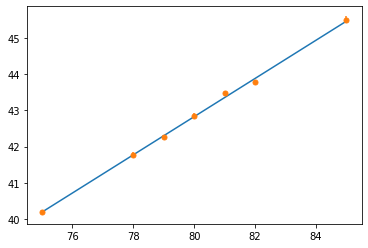

In [84]:
half_max, half_max_err = convert_errstr_array(errstr_list)
get_params(half_max, half_max_err, mw, atlas_hw)

In [85]:
0.5*(80.901748763738 + 80.26195167653701)

80.58185022013751

In [67]:
(a, b), cov = np.polyfit(mw, half_max, deg=1, cov=True, w = 1. / half_max_err)

<ErrorbarContainer object of 3 artists>

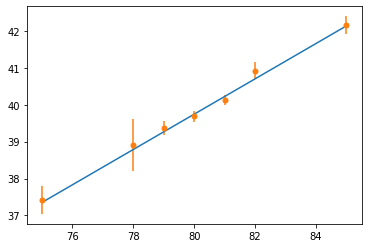

In [68]:
plt.plot(mw, a * mw + b, label="Fit")
plt.errorbar(mw, half_max, yerr=half_max_err, label="data", marker="o", ls="", ms=5.0)

In [69]:
print(a,b)

0.4787593232345003 1.4448534122900802


In [70]:
# print(a, b)

In [71]:
print(cov)

[[ 5.43463960e-04 -4.38224226e-02]
 [-4.38224226e-02  3.53577235e+00]]


In [61]:
# get mass of dataset from half-max obtained from ATLAS data
# print((42.86 - b) / a)
# this is the one with etiso < 8, njet == 0

In [62]:
# get mass of dataset from half-max obtained from ATLAS data
print(( 42.859800 - b) / a)
# one with njet == 0, ptw < 10 (but need to do it again sinec we didnt 
# use correct ATLAS value)

80.26195167653701


In [54]:
80.3878878906251 - 80.28737447587079

0.1005134147543032

In [43]:
print((   48.824768 - b) / a)

91.53801863004914


0.30966251508938825


In [ ]:
# systematic error due to QCD scale factor